## Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RandomizedSearchCV

## Loading the data

In [2]:
df = pd.read_csv("../data/RBioDeg_curated.csv")
df.sample(5).head()

,CAS,Ready_Biodeg,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,...,EState_VSA9,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState8,VSA_EState9,FractionCSP3,NHOHCount,RingCount
155,108-21-4,1.0,0.571969,0.060095,-0.803739,-0.267508,-0.817421,0.889805,-0.748603,1.180769,...,-0.720158,0.350129,-0.773727,-0.476154,0.027731,0.628451,-0.045418,0.853436,-0.781471,-0.957207
179,108-90-7,0.0,-0.863122,0.759026,0.575229,-0.124004,-0.733182,-0.987076,1.904770,-0.201365,...,0.166715,-0.713024,-0.678985,-0.476154,0.069854,-0.698329,-0.045418,-1.186965,-0.781471,0.016347
1314,826-36-8,0.0,0.962464,0.197471,-0.822430,0.450673,-0.388324,-0.302543,0.352356,0.018520,...,-0.720158,0.479671,-0.363066,-0.488155,0.143798,1.484941,-0.045418,1.080147,0.072201,0.016347
1584,NOCAS_862301,0.0,-0.839478,0.317944,-0.564995,0.621550,-0.663503,-1.087371,0.224914,0.336132,...,-0.281829,-0.713024,-0.773727,2.238021,0.069854,-0.177163,-0.045418,-0.549340,0.925874,0.016347
52,102-60-3,0.0,0.394003,-0.103323,-0.044859,-0.682432,0.720041,-0.819991,-0.250789,-1.289795,...,-0.720158,-0.290712,3.748625,-0.476154,0.069854,1.995645,-0.045418,1.363536,2.633219,-0.957207


In [3]:
df['Ready_Biodeg'].value_counts()

0.0    919
1.0    697
Name: Ready_Biodeg, dtype: int64

In [4]:
df.set_index('CAS', inplace = True)

In [5]:
df.sample(5).head()

,Ready_Biodeg,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BalabanJ,...,EState_VSA9,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState8,VSA_EState9,FractionCSP3,NHOHCount,RingCount
CAS,,,,,,,,,,,,,,,,,,,,,
131-09-9,0.0,1.262938,0.110032,-0.636546,0.659866,0.318003,0.113388,0.474330,-0.912757,-0.795778,...,0.166715,1.869035,-0.718563,0.215799,0.018495,-0.698329,-0.045418,-1.186965,-0.781471,1.963455
1897-45-6,1.0,0.147917,0.156114,-0.784356,0.139651,0.505880,-0.543859,1.148439,-1.065198,1.368424,...,3.631860,-0.713024,1.281135,-0.509917,0.069854,-0.698329,-0.045418,-1.186965,-0.781471,0.016347
80-07-9,0.0,1.255064,-2.214383,-0.468596,2.142728,0.677598,0.199577,0.964982,-1.055035,-0.548764,...,1.053588,-0.668038,-0.654389,-0.476154,0.069854,-0.698329,-2.167395,-1.186965,-0.781471,0.989901
99-71-8,0.0,0.245869,0.447032,-0.231296,1.166007,-0.428884,-0.452703,-1.062477,0.458290,-0.087037,...,-0.329772,-0.713024,0.301530,0.040921,0.255314,0.446088,-0.045418,-0.166765,0.072201,0.016347
66-72-8,1.0,0.708834,0.001963,-0.641752,0.775730,-0.291990,-0.175495,-1.043677,1.411124,0.720962,...,-0.329772,0.797101,1.381224,-0.141087,0.039004,-0.359014,-0.045418,-0.549340,0.925874,0.016347


In [6]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values_table(df)

Selected dataframe has 64 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [8]:
X = df.drop('Ready_Biodeg', axis=1)
y = df['Ready_Biodeg']

In [9]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2)

In [10]:
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)


In [11]:
dt.fit(trainX, trainY)
dt_preds_train = dt.predict(trainX)
dt_preds_test = dt.predict(testX)

In [12]:
print('Decision Tree:\n> Accuracy on training data = {:.4f}\n> Accuracy on test data = {:.4f}'.format(
    accuracy_score(trainY, dt_preds_train),
    accuracy_score(testY, dt_preds_test)
))

Decision Tree:
> Accuracy on training data = 1.0000
> Accuracy on test data = 0.6944


In [13]:
bc_params = {
    'base_estimator': dt,
    'n_estimators': 50,
    'max_samples': 0.5,
    'random_state': 11,
    'n_jobs': -1
}
bc = BaggingClassifier(**bc_params)

In [14]:
bc.fit(trainX, trainY)
bc_preds_train = bc.predict(trainX)
bc_preds_test = bc.predict(testX)

In [15]:
print('Bagging Classifier:\n> Accuracy on training data = {:.4f}\n> Accuracy on test data = {:.4f}'.format(
    accuracy_score(trainY, bc_preds_train),
    accuracy_score(testY, bc_preds_test)
))

Bagging Classifier:
> Accuracy on training data = 0.9621
> Accuracy on test data = 0.7809


In [16]:
rf_params = {
    'n_estimators': 100,
    'criterion': 'entropy',
    'max_features': 0.5,
    'min_samples_leaf': 10,
    'random_state': 11,
    'n_jobs': -1
}
rf = RandomForestClassifier(**rf_params)

In [17]:
rf.fit(trainX, trainY)
rf_preds_train = rf.predict(trainX)
rf_preds_test = rf.predict(testX)

In [18]:
print('Random Forest Classifier:\n> Accuracy on training data = {:.4f}\n> Accuracy on test data = {:.4f}'.format(
    accuracy_score(trainY, rf_preds_train),
    accuracy_score(testY, rf_preds_test)
))

Random Forest Classifier:
> Accuracy on training data = 0.9164
> Accuracy on test data = 0.7901


In [19]:
X = df.drop('Ready_Biodeg', axis=1).values
y = df['Ready_Biodeg'].values

In [20]:
skf = StratifiedKFold(n_splits=10)

In [21]:
scores = []

In [22]:
for train_index, test_index in skf.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf_skf = RandomForestClassifier(**rf.get_params())
    
    rf_skf.fit(x_train, y_train)
    y_pred = rf_skf.predict(x_test)
    
    scores.append(accuracy_score(y_test, y_pred))

In [23]:
scores

[0.7592592592592593,
 0.7716049382716049,
 0.8024691358024691,
 0.8950617283950617,
 0.7469135802469136,
 0.7962962962962963,
 0.8260869565217391,
 0.7577639751552795,
 0.7888198757763976,
 0.7453416149068323]

In [24]:
print('StratifiedKFold: Mean Accuracy Score = {}'.format(np.mean(scores)))

StratifiedKFold: Mean Accuracy Score = 0.7889617360631853


In [25]:
scores = cross_val_score(rf, trainX, trainY, cv=5)
scores

array([0.77606178, 0.76447876, 0.82945736, 0.76356589, 0.79457364])

In [26]:
print('KFold: Mean Accuracy Score = {}'.format(np.mean(scores)))

KFold: Mean Accuracy Score = 0.7856274879530694


In [27]:
rf_rand = RandomForestClassifier()

In [28]:
param_dist = {"n_estimators": list(range(10,210,10)),
              "max_depth": list(range(3,20)),
              "max_features": list(range(1, 10)),
              "min_samples_split": list(range(2, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
              
n_iter_search = 50

In [29]:
random_search = RandomizedSearchCV(rf_rand, param_distributions=param_dist, scoring='accuracy',
                                   n_iter=n_iter_search)
random_search.fit(trainX, trainY)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [30]:
# View best hyperparameters
print('Best number of estimators:', random_search.best_estimator_.get_params()['n_estimators'])
print('Best min_samples_split:', random_search.best_estimator_.get_params()['max_depth'])

Best number of estimators: 70
Best min_samples_split: 11


In [31]:
random_search.best_params_

{'n_estimators': 70,
 'min_samples_split': 8,
 'max_features': 5,
 'max_depth': 11,
 'criterion': 'entropy',
 'bootstrap': True}

In [32]:
results = pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score')
for i, row in results.head().iterrows():
    print("Model rank: {}".format(row.rank_test_score))
    print("Mean validation score: {:.3f} (std: {:.3f})".format(row.mean_test_score, row.std_test_score))
    print("Model Hyperparameters: {}\n".format(row.params))

Model rank: 1
Mean validation score: 0.802 (std: 0.021)
Model Hyperparameters: {'n_estimators': 70, 'min_samples_split': 8, 'max_features': 5, 'max_depth': 11, 'criterion': 'entropy', 'bootstrap': True}

Model rank: 2
Mean validation score: 0.798 (std: 0.018)
Model Hyperparameters: {'n_estimators': 90, 'min_samples_split': 5, 'max_features': 3, 'max_depth': 18, 'criterion': 'gini', 'bootstrap': True}

Model rank: 3
Mean validation score: 0.796 (std: 0.018)
Model Hyperparameters: {'n_estimators': 80, 'min_samples_split': 8, 'max_features': 7, 'max_depth': 16, 'criterion': 'entropy', 'bootstrap': True}

Model rank: 4
Mean validation score: 0.795 (std: 0.019)
Model Hyperparameters: {'n_estimators': 140, 'min_samples_split': 10, 'max_features': 8, 'max_depth': 15, 'criterion': 'gini', 'bootstrap': True}

Model rank: 5
Mean validation score: 0.795 (std: 0.019)
Model Hyperparameters: {'n_estimators': 200, 'min_samples_split': 7, 'max_features': 6, 'max_depth': 17, 'criterion': 'entropy', 'bo

In [33]:
feat_imps = pd.DataFrame({'importance': rf.feature_importances_}, index=df.columns[:-1])
feat_imps.sort_values(by='importance', ascending=False, inplace=True)

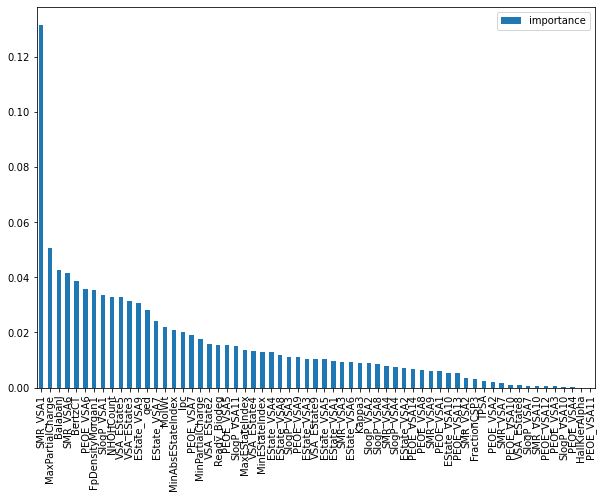

In [34]:
feat_imps.plot(kind='bar', figsize=(10,7))